# Import Packages

In [31]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
# For Prediction:

# For nice Plots
%matplotlib inline
plt.style.use('default')

# Read in the Data

In [32]:
dir_path = os.path.abspath("")
fname = dir_path+'\countrydf.csv'
countrydf = pd.read_csv(fname, encoding='latin-1')
countrydf = countrydf.loc[:, ~countrydf.columns.str.contains('^Unnamed')]

# Columns Names/First Five Lines

In [33]:
countrydf.head()

,Country,Year,Average dietary energy supply adequacy (percent) (3-year average),Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Gross domestic product per capita, PPP, (constant 2017 international $)",Prevalence of undernourishment (percent) (3-year average),...,Number of severely food insecure people (million) (annual value),Number of severely food insecure male adults (million) (annual value),Number of severely food insecure female adults (million) (annual value),Number of moderately or severely food insecure people (million) (annual value),Number of moderately or severely food insecure male adults (million) (annual value),Number of moderately or severely food insecure female adults (million) (annual value),Port,Resiliency,MODIS NDVI Annual Average,Future Undernourishment
0,Algeria,2002,127.0,2938.0,59.0,77.0,19.0,0.1,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.882026,0.120326,-0.7
1,Algeria,2003,129.0,2993.0,59.0,79.4,19.3,0.1,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.882026,0.120326,-0.3
2,Algeria,2004,130.0,3029.0,59.0,81.4,20.0,0.1,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.882026,0.120215,0.0
3,Algeria,2005,130.0,3042.0,59.0,83.0,20.3,0.1,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.882026,0.120326,-0.3
4,Algeria,2006,131.0,3071.0,59.0,83.3,21.0,0.1,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,19.882026,0.120326,-0.3


# Number of Areas in this Dataset

In [34]:
print(len(countrydf['Country'].unique()))
print("There are " + str(len(countrydf['Country'].unique())) + " unique areas in this African dataset.")

54
There are 54 unique areas in this African dataset.


# Number of Feature Variables

In [35]:
num_cols = countrydf.iloc[:, 1:].shape[1]-1
print(num_cols)

67


# Countries with Data in the Response Column

In [36]:
CWD = []
CND = []
for i in range(0, len(countrydf)-1):
    if countrydf.loc[i,'Future Undernourishment'] > 0:
        if str(countrydf.loc[i,'Country']) in CWD:
            continue
        else:
            CWD.append(countrydf.loc[i,'Country'])
    else:
        continue
print(CWD)
print(len(CWD))
for i in range(0, len(countrydf)-1):
    if str(countrydf.loc[i,'Country']) in CWD:
        continue
    else:
        if str(countrydf.loc[i,'Country']) in CND:
            continue
        else:
            CND.append(countrydf.loc[i,'Country'])
print(CND)
print(len(CND))

['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "CÃ\x83Â´te d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Togo', 'Tunisia', 'United Republic of Tanzania', 'Zambia', 'Africa']
43
['Algeria', 'Burundi', 'Eritrea', 'Guinea', 'Libya', 'Mozambique', 'Seychelles', 'Somalia', 'South Sudan', 'Uganda', 'Zimbabwe']
11


# Percent of Missing Data

In [37]:
total = countrydf.isnull().sum().sort_values(ascending=False)
percent = (countrydf.isnull().sum()/countrydf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
pd.set_option('display.max_rows', 1000)
missing_data

,Total,Percent
Number of severely food insecure people (million) (annual value),1073,0.993519
Number of moderately or severely food insecure male adults (million) (annual value),1073,0.993519
Prevalence of moderate or severe food insecurity in the female adult population (percent) (annual value),1073,0.993519
Prevalence of moderate or severe food insecurity in the male adult population (percent) (annual value),1073,0.993519
Number of moderately or severely food insecure people (million) (annual value),1073,0.993519
Number of severely food insecure female adults (million) (annual value),1073,0.993519
Prevalence of moderate or severe food insecurity in the total population (percent) (annual value),1073,0.993519
Number of severely food insecure male adults (million) (annual value),1073,0.993519
Prevalence of severe food insecurity in the female adult population (percent) (annual value),1073,0.993519
Prevalence of severe food insecurity in the male adult population (percent) (annual value),1073,0.993519


# Countries Missing from Each Year

In [38]:
missing2001 = []
missingothers = []
for i in range(0, len(countrydf['Future Undernourishment'])):
    if str(countrydf.loc[i,'Future Undernourishment']) == 'nan'and str(countrydf.loc[i,'Year']) == '2001':
      missing2001.append(countrydf.loc[i,'Country'])
    elif str(countrydf.loc[i,'Future Undernourishment']) == 'nan'and str(countrydf.loc[i,'Year']) == '2002':
      missingothers.append(countrydf.loc[i,'Country'])
    else:
      continue
print('Countries Missing from 2001',missing2001)
print('Countries Missing from 2002-2020',  missingothers)

Countries Missing from 2001 ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "CÃ\x83Â´te d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti', 'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Africa']
Countries Missing from 2002-2020 ['Burundi', 'Eritrea', 'Guinea', 'Libya', 'Mozambique', 'Seychelles', 'Somalia', 'South Sudan', 'Uganda', 'Zimbabwe']


# Plot Response

c:\Users\stvp2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


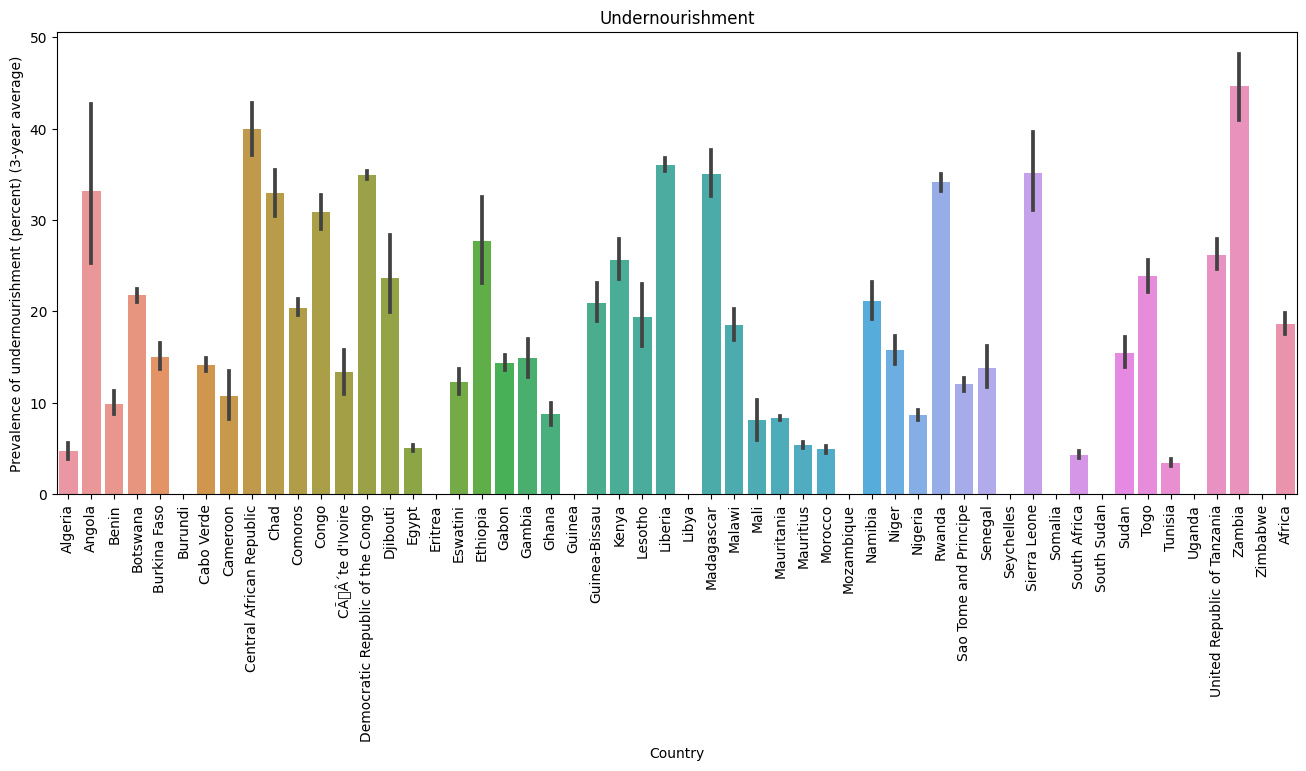

In [39]:
Future_Undernourishment_Col_Name = "Prevalence of undernourishment (percent) (3-year average)"
data = countrydf[['Country',Future_Undernourishment_Col_Name]]
data      
fig, ax = plt.subplots(figsize=(16,6))
fig = sns.barplot(x='Country', y=Future_Undernourishment_Col_Name, data=data)
plt.xticks(rotation=90);
plt.title('Undernourishment');

c:\Users\stvp2\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


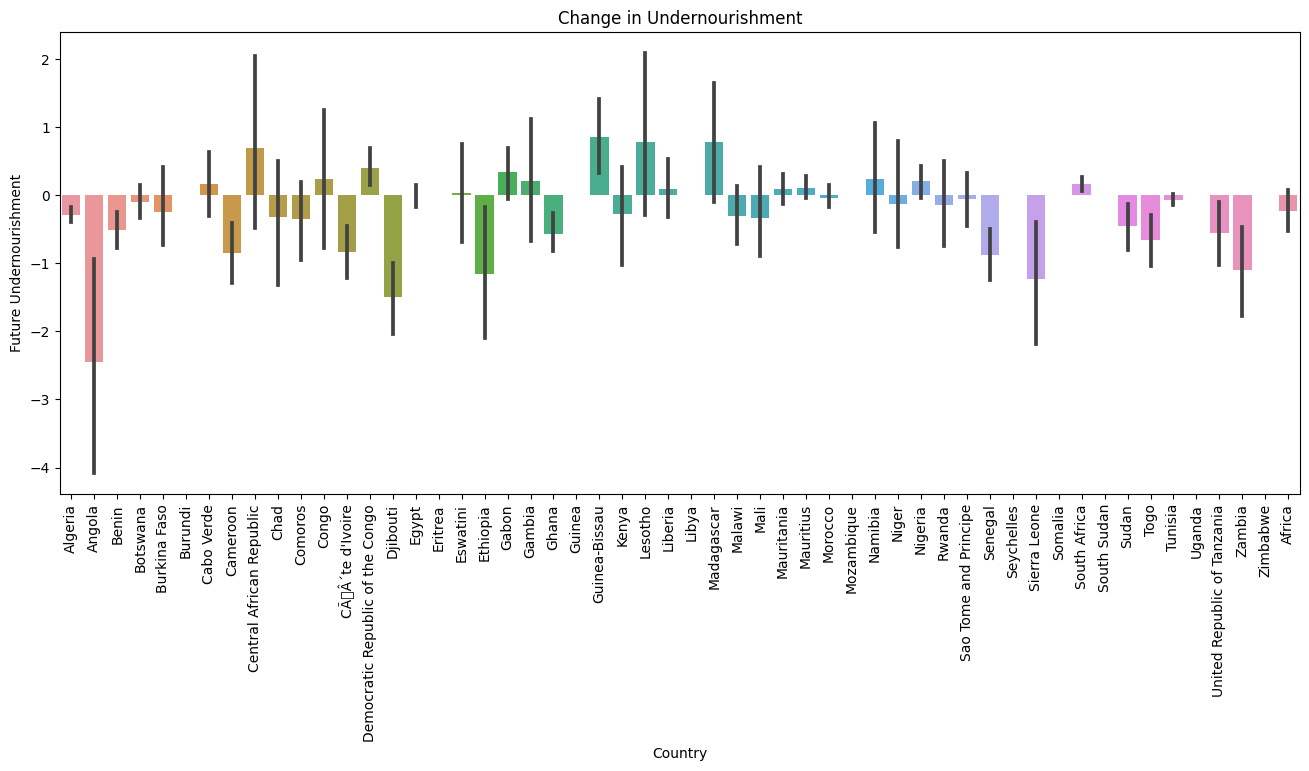

In [40]:
data = countrydf[['Country','Future Undernourishment']]
data      
fig, ax = plt.subplots(figsize=(16,6))
fig = sns.barplot(x='Country', y='Future Undernourishment', data=data)
plt.xticks(rotation=90);
plt.title('Change in Undernourishment');